Visualização de dados
================

O objetivo da computação científica é promover a compreensão do significado dos muitos números que calculamos. Precisamos de pós-processamento, análise estatística e visualização gráfica dos nossos dados. As seções seguintes descrevem

- Matplotlib/Pylab - que permitem gerar gráficos de alta qualidade do tipo $y = f(x)$ (e um pouco mais).

<!-- Visual Python - que é uma ferramenta muito útil para gerar rapidamente animações de processos dependentes do tempo ocorrendo no espaço 3D -->

Matplotlib (Pylab): plotando $y = f(x)$ (e um pouco mais)
-------------------------------------------------------

*Matplotlib* é uma biblioteca Python para plotagem 2D que produz figuras com qualidade de publicação em uma variedade de formatos impressos e interativos. O Matplotlib tenta fazer as coisas fáceis ainda mais fáceis, e as difíceis, possíveis. Você pode gerar gráficos, histogramas, espectros de energia, gráficos de barras, de erros, de dispersão, etc, com apenas algumas linhas de código.

Para informações mais detalhadas, verifique estes links

- Uma introdução muito boa sobre Matplotlib orientado a objetos e um resumo de todos os modos relevantes para mudança de estilo, tamanho de figura, largura de linhas, etc. pode ser encontrada nesta útil referência:<http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb>

- Tutoriais do Matplotlib

- Homepage do Matplotlib

- Lista de exemplos simples (capturas de tela) <http://matplotlib.sourceforge.net/users/screenshots.html>

- Galeria de exemplos: <http://matplotlib.sourceforge.net/gallery.html>

### Matplotlib e Pylab

Podemos ver o Matplotlib como uma *biblioteca de plotagem orientada a objetos*. Pylab é uma interface para o mesmo conjunto de funções que imita a interface de plotagem do Matlab.

Pylab é um pouco mais conveniente de usar para plotagens fáceis e o Matplotlib dá um controle muito mais detalhado sobre a forma como os plots são criados. Se você usa o Matplotlib rotineiramente para produzir figuras, aconselhamos você a aprender sobre a interface orientada a objetos do Matplotlib (em vez da interface Pylab).

Este capítulo concentra-se na interface Pylab.

### Primeiro exemplo

A forma recomendada de usar Matplotlib em um exemplo simples é mostrada aqui (vamos chamá-lo de exemplo 1a):

In [1]:
%matplotlib inline

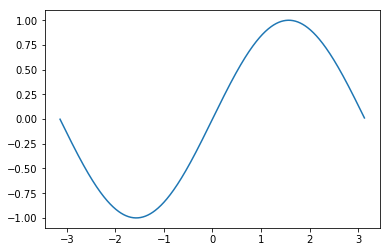

In [2]:
# exemplo 1a
import numpy as np                  # obtém acesso aos arrays do numpy
import matplotlib.pyplot as plt     # funções de plotagem

x = np.arange(-3.14, 3.14, 0.01)    # cria eixo x de dados
y = np.sin(x)                       # calcula eixo y de dados
plt.plot(x, y)                      # cria plot

### Como importar tudo isso: matplotlib, pylab, pyplot, numpy 

O sub-módulo `matplotlib.pyplot` fornece uma interface orientada a objetos para a biblioteca de plotagem. Muitos dos exemplos na documentação do Matplotlib seguem a convenção de importação do `matplotlib.pyplot` como `plt` e o `numpy` como `np`. Evidentemente, a decisão sobre importar a biblioteca `numpy` com o mome `np` (como é frequentemente feito nos exemplos da documentação), ou com o nome `N` como feito neste texto (e nos primórdios do `Numeric`, predecessor do NumPy), ou ainda com qualquer outro nome, é uma decisão plena do usuário. Da mesma forma, é uma questão de gosto pessoal se o submódulo de plotagem `matplotlib.pyplot` deve ser importado como `plt`, como é feito na documentação do Matplotlib, ou como `plot`, se a argumentação for por uma escrita mais clara, etc.

Como sempre, um equilíbrio deve ser encontrado entre preferências pessoais e consistência com a prática comum ao escolher esses nomes. A consistência com o uso comum é, certamente, mais importante se o código estiver propenso a ser usado por outros ou publicado.

Uma plotagem quase sempre precisa de *arrays* de dados numéricos e é por esta razão que o módulo NumPy é bastante usado: ele fornece manipulação rápida e eficiente de memória em Python. 

Poderíamos, portanto, ter escrito o exemplo 1a acima como o exemplo 1b (que é idêntico em funcionalidade ao anterior na criação da mesma plotagem):

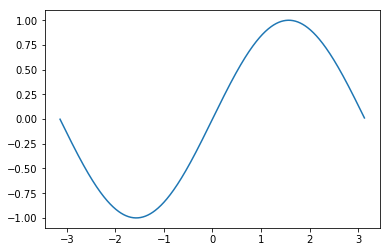

In [3]:
# exmplo 1b
import pylab
import numpy as N

x = N.arange (-3.14, 3.14, 0.01)
y = N.sin(x)

pylab.plot(x, y)

Pelo fato de `numpy.arange` e `numpy.sin` serem objetos já importados para o espaço de nomes (conveniente) `pylab`, também poderíamos ter escrito o exemplo 1c:

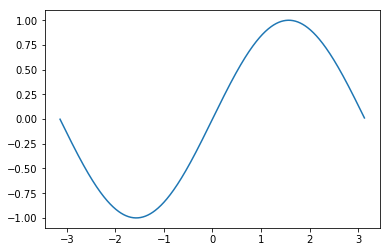

In [4]:
# exemplo 1c
import pylab as p

x = p.arange(-3.14, 3.14, 0.01)
y = p.sin(x)

p.plot(x, y)

Se realmente quisermos reduzir a digitação de caracteres, também poderíamos importar toda a funcionalidade do módulo conveniente `pylab` e reescrever o código como no exemplo 1d:

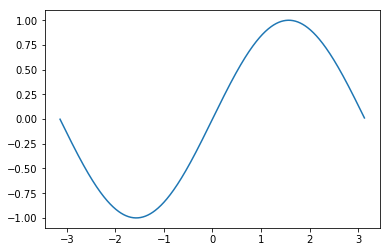

In [5]:
# exemplo 1d
from pylab import *  # geralmente não recomendado
                     # OK para testes interativos

x = arange(-3.14, 3.14, 0.01)
y = sin(x)
plot(x, y)
show()

Isto pode ser extremamente conveniente, mas vem com um grande e "salutar" aviso:

- Enquanto usar `from pylab import *` é aceitável no prompt de comando para criar gráficos interativamente e analisar dados, isto nunca deve ser usado como regra de uso nos scripts de plotagem.

- O Pylab fornece mais de 800 objetos diferentes que são todos importados para o espaço de nomes global quando executamos o comando `from pylab import *`. Isto não é uma boa prática, e pode gerar conflitos com outros objetos que já existam ou com os que serão criados mais tarde.

- Como uma regra de uso: nunca invoque `from somewhere import *` em programas que salvamos. Esta é uma opção razoável no *prompt* de comando.

Nos exemplos a seguir, usamos a interface do `pylab` para as rotinas de plotagem, mas isto é puramente uma questão de gosto e hábito. De nenhuma maneira, é a única opção a seguir (note que os autores do Matplotlib recomendam o estilo de importação do exemplo 1a. Veja também: [Matplotlib FAQ](http://matplotlib.sourceforge.net/faq) e [Matplotlib, pylab, and pyplot: how are they related?](http://matplotlib.sourceforge.net/faq/usage_faq.html#matplotlib-pylab-and-pyplot-how-are-they-related))

### Modo `inline` do  IPython

Dentro do Jupyter Notebook ou Qtconsole, podemos usar o comando mágico `%matplotlib inline` para fazer novas plotagens aparecerem dentro do próprio console ou notebook. Em vez disso, para forçar janelas *pop-up*,  use `%matplotlib qt`.

Há também o nome mágico `%pylab`, o qual não só irá mudar para a plotagem `inline`, mas também executará automaticamente `from pylab import *`.

### Salvando figuras como arquivos

Depois de ter criado uma figura (usando o comando `plot`) e adicionado legendas, rótulos, etc, você tem duas opções para salvar a plotagem.

1. Exibir a figura (usando `show`) e salvá-la de forma *interativa* clicando no botão de salvamento <i class="fa fa-floppy-o" aria-hidden="true"></i>.

2. Sem exibir a figura, salvá-la do seu código Python diretamente para arquivo. O comando a usar é `savefig`. O formato é determinado pela extensão do nome do arquivo que você fornece. Aqui está um exemplo (`pylabsavefig.py`). 

In [6]:
# pylabsavefig.py

import pylab
import numpy as N

x = N.arange(-3.14, 3.14, 0.01)
y = N.sin(x)

pylab.plot(x, y, label='sin(x)')
pylab.savefig('static/data/15-meuplot.png')  # salva arquivo png 
pylab.savefig('static/data/15-meuplot.eps')  # salva arquivo eps
pylab.savefig('static/data/15-meuplot.pdf')  # salva arquivo pdf
pylab.close()

Uma nota sobre formatos de arquivo: escolha o formato de arquivo `png` se você pretende incluir o seu gráfico em um documento do Word ou em uma página web. Escolha os formatos `pdf` ou `eps` se você pretende incluir a figura em um documento LaTeX - dependendo se você for compilar usando `latex` (requer `eps`) ou `pdflatex` (pode usar `pdf` [melhor] ou `png`). Se a versão do Microsoft Word (ou outro software de processamento de texto que você usa) puder lidar com arquivos `pdf`, é melhor usar `pdf` do que `png`.

Tanto `pdf` quanto `eps` são formatos vetoriais de arquivo, o que significa que podemos ampliar a imagem sem que ela perca a qualidade (as linhas ainda serão nítidas). Formatos de arquivos como `png`, `jpg`, `gif`, `tif` e `bmp` salvam a imagem em formato de mapa de bits (*bitmap*), ou seja, uma matriz de valores de cor, que aparecerá desfocada ou pixelizada ao ser ampliada ou impressa em alta resolução.

### Modo interativo

O Matplotlib pode ser executado de dois modos:

   - não interativo (padrão)
   
   - interativo.
   
No modo não interativo, nenhum plot será exibido até que o comando `show()` tenha sido chamado. Neste modo, o comando `show()` deve ser a última declaração do seu programa. 

No modo interativo, os plots serão imediatamente mostrados depois que o comando de plotagem tiver sido chamado. 

Pode-se ativar o modo interativo com o comando `pylab.ion()` e desativá-lo com o comando `pylab.ioff()`. O comando mágico `%matplotlib` do IPython também habilita o modo interativo.

### Lidando com os detalhes de sua plotagem

O Matplotlib permite-lhe fazer o "ajuste fino" de suas plotagens nos mínimos detalhes. Aqui está um exemplo:

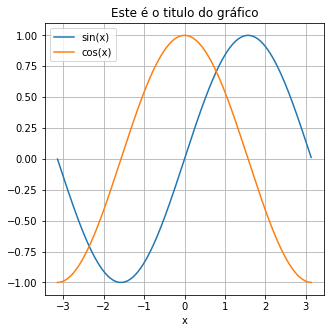

In [7]:
import pylab
import numpy as N

x = N.arange(-3.14, 3.14, 0.01)
y1 = N.sin(x)
y2 = N.cos(x)
pylab.figure(figsize =(5 , 5))
pylab.plot(x, y1, label='sin(x)')
pylab.plot(x, y2, label='cos(x)')
pylab.legend()
pylab.grid()
pylab.xlabel('x')
pylab.title('Este é o titulo do gráfico')

Segue uma lista de outros comandos úteis:

-   `figure(figsize=(5,5))` configura o tamanho da figura para 5x5 (polegadas)

-   `plot(x,y1,label=’sin(x)’)` a palavra-chave “label” define o nome desta linha. O rótulo da linha será mostrado na legenda se o comando `legend()` for usado posteriormente.

-   Note que chamando o comando `plot` repetidamente, você poderá sobrepor uma série de curvas.

-   `axis([-2,2,-1,1])` restringe a área de plotagem nos limites de `xmin=-2` a `xmax=2` na direção x e de `ymin=-1` a `ymax=1` na direção y.

-   `legend()` este comando mostrará uma legenda com os rótulos definidos no comando plot. Experimente `help(pylab.legend)` para aprender mais sobre o posicionamento das legendas.

-   `grid()` este comando mostrará as linhas de grade em segundo plano.

-   `xlabel(’...’)` e `ylabel(’...’)` adicionam legendas aos eixos.

Além disso, você pode escolher diferentes estilos e espessuras de linha, cores e símbolos para os dados a serem plotados. A sintaxe é muito semelhante à do Matlab. Por exemplo:

-   `plot(x,y,’og’)` plotará círculos (`o`) na cor verde (`g`)

-   `plot(x,y,’-r’)` plotará uma linha (`-`) na cor vermelha (`r`)

-   `plot(x,y,’-b’,linewidth=2)` plotará uma linha azul (`b`) com dois pixels de espessura `linewidth=2`, que é duas vezes mais espessa do que o padrão.

A lista completa de opções pode ser encontrada ao digitar `help(pylab.plot)` no *prompt* do Python. Como esta documentação é tão útil, repetimos partes dela aqui:

plot(*args, **kwargs)
        Plot lines and/or markers to the
        :class:`~matplotlib.axes.Axes`.  *args* is a variable length
        argument, allowing for multiple *x*, *y* pairs with an
        optional format string.  For example, each of the following is
        legal::

            plot(x, y)         # plot x and y using default line style and color
            plot(x, y, 'bo')   # plot x and y using blue circle markers
            plot(y)            # plot y using x as index array 0..N-1
            plot(y, 'r+')      # ditto, but with red plusses

        If *x* and/or *y* is 2-dimensional, then the corresponding columns
        will be plotted.

        An arbitrary number of *x*, *y*, *fmt* groups can be
        specified, as in::

            a.plot(x1, y1, 'g^', x2, y2, 'g-')

        Return value is a list of lines that were added.

        The following format string characters are accepted to control
        the line style or marker:

        ================    ===============================
        character           description
        ================    ===============================
        '-'                 solid line style
        '--'                dashed line style
        '-.'                dash-dot line style
        ':'                 dotted line style
        '.'                 point marker
        ','                 pixel marker
        'o'                 circle marker
        'v'                 triangle_down marker
        '^'                 triangle_up marker
        '<'                 triangle_left marker
        '>'                 triangle_right marker
        '1'                 tri_down marker
        '2'                 tri_up marker
        '3'                 tri_left marker
        '4'                 tri_right marker
        's'                 square marker
        'p'                 pentagon marker
        '*'                 star marker
        'h'                 hexagon1 marker
        'H'                 hexagon2 marker
        '+'                 plus marker
        'x'                 x marker
        'D'                 diamond marker
        'd'                 thin_diamond marker
        '|'                 vline marker
        '_'                 hline marker
        ================    ===============================

    The following color abbreviations are supported:

    ==========  ========
    character   color
    ==========  ========
    'b'         blue
    'g'         green
    'r'         red
    'c'         cyan
    'm'         magenta
    'y'         yellow
    'k'         black
    'w'         white
    ==========  ========

    In addition, you can specify colors in many weird and
    wonderful ways, including full names (``'green'``), hex
    strings (``'#008000'``), RGB or RGBA tuples (``(0,1,0,1)``) or
    grayscale intensities as a string (``'0.8'``).  Of these, the
    string specifications can be used in place of a ``fmt`` group,
    but the tuple forms can be used only as ``kwargs``.

    Line styles and colors are combined in a single format string, as in
    ``'bo'`` for blue circles.

    The *kwargs* can be used to set line properties (any property that has
    a ``set_*`` method).  You can use this to set a line label (for auto
    legends), linewidth, anitialising, marker face color, etc.  Here is an
    example::

        plot([1,2,3], [1,2,3], 'go-', label='line 1', linewidth=2)
        plot([1,2,3], [1,4,9], 'rs',  label='line 2')
        axis([0, 4, 0, 10])
        legend()

    If you make multiple lines with one plot command, the kwargs
    apply to all those lines, e.g.::

        plot(x1, y1, x2, y2, antialised=False)

    Neither line will be antialiased.

    You do not need to use format strings, which are just
    abbreviations.  All of the line properties can be controlled
    by keyword arguments.  For example, you can set the color,
    marker, linestyle, and markercolor with::

        plot(x, y, color='green', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=12).  See
             :class:`~matplotlib.lines.Line2D` for details.

O uso de diferentes estilos de linha e espessuras é particularmente útil quando a cor não pode ser usada para distinguir linhas (por exemplo, quando o gráfico for utilizado em um documento que será impresso apenas em preto e branco).

### Plotando mais de uma curva

Existem três métodos diferentes para plotar mais do que uma curva.

#### Duas (ou mais) curvas em um gráfico

Chamando o comando `plot` repetidamente, mais do que uma curva pode ser desenhada no mesmo gráfico. Exemplo:

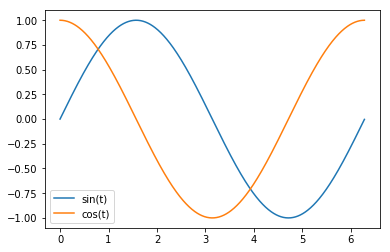

In [8]:
import numpy as N
t = N.arange(0,2*N.pi,0.01)

import pylab
pylab.plot(t,N.sin(t),label='sin(t)')
pylab.plot(t,N.cos(t),label='cos(t)')
pylab.legend()

#### Dois (ou mais gráficos) em uma janela de figura

O comando `pylab.subplot` permite-lhe organizar vários gráficos dentro da mesma janela. A sintaxe geral é

    subplot(numRows, numCols, plotNum)

Aqui está um exemplo completo de plotagem das curvas seno e cosseno em dois gráficos alinhados um embaixo do outro na mesma janela:

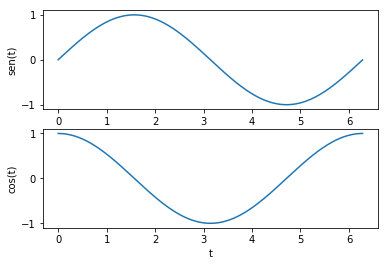

In [9]:
import numpy as N
t = N.arange (0 , 2 * N . pi , 0.01)

import pylab

pylab.subplot(2, 1, 1)
pylab.plot(t, N.sin(t))
pylab.xlabel('t')
pylab.ylabel('sen(t)')

pylab.subplot(2, 1, 2)
pylab.plot(t, N.cos(t))
pylab.xlabel('t')
pylab.ylabel('cos(t)')

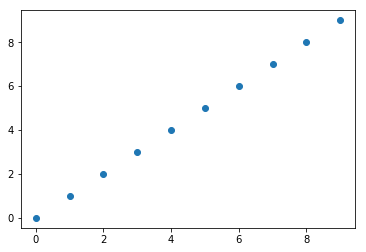

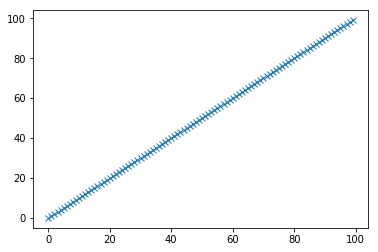

In [10]:
import pylab
pylab.figure(1)
pylab.plot(range(10),'o')

pylab.figure(2)
pylab.plot(range(100),'x')

Note que você pode usar `pylab.close()` para fechar uma, algumas ou todas as janelas de figura (use `help(pylab.close)` para aprender mais).

### Histogramas

O programa abaixo demonstra como criar histogramas a partir de dados estatísticos no Matplotlib. O plot resultante é mostrado na figura

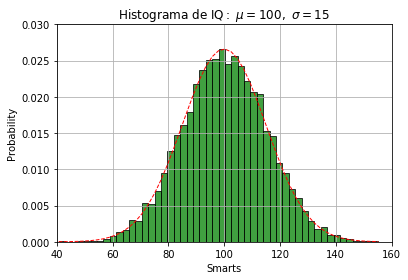

In [11]:
# versão modificada de
# http://matplotlib.sourceforge.net/plot_directive/mpl_examples/...
#                                 /pylab_examples/histogram_demo.py
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# cria dados
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# histograma dos dados
n, bins, patches = plt.hist(x, 50, normed=1,
                            facecolor='green', alpha=0.75,edgecolor='black')

# alguns detalhes
plt.xlabel('Smarts')
plt.ylabel('Probability')

# strings Latex para legendagem e títulos
plt.title(r'$\mathrm{Histograma\ de\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)


# adiciona linha de 'melhor ajuste' 
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

# salva para arquivo
plt.savefig('static/data/15-pylabhistogram.pdf')

Não tente compreender cada comando neste arquivo: alguns são bastante especializados e não foram abordados neste texto. A intenção é fornecer alguns exemplos para mostrar o que pode - em princípio - ser feito com Matplotlib. Se você precisa de um plot como este, a expectativa é que você terá que experimentar e possivelmente aprender um pouco mais sobre Matplotlib.

### Visualizando dados de matrizes

O programa abaixo demonstra como criar uma plotagem em bitmap das entradas de uma matriz.

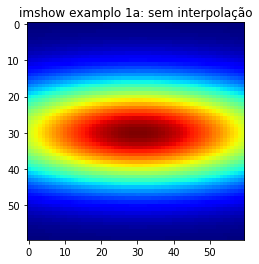

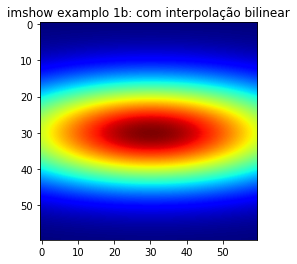

In [12]:
import numpy as np
import matplotlib.mlab as mlab    #  comandos compatíveis com Matlab
import matplotlib.pyplot as plt

# cria matriz Z que contém alguns dados interessantes
delta = 0.1
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z = mlab.bivariate_normal(X, Y, 3.0, 1.0, 0.0, 0.0)

# mostra a matriz pura de dados de Z em uma figura
plt.figure(1)
plt.imshow(Z, interpolation='nearest', cmap=cm.jet)
plt.title("imshow examplo 1a: sem interpolação")
plt.savefig("static/data/15-pylabimshow1a.pdf")

# mostra os dados interpolados em outra figura
plt.figure(2)
im = plt.imshow(Z, interpolation='bilinear', cmap=cm.jet)
plt.title("imshow examplo 1b: com interpolação bilinear")
plt.savefig("static/data/15-pylabimshow1b.pdf")

Para usar diferentes mapas de cor, fazemos uso do módulo `matplotlib.cm` (onde `cm` significa *colormap*). O código abaixo demonstra como podemos selecionar mapas de cor no conjunto de mapas já fornecidos e como podemos modificá-los (aqui, reduzindo o número de cores no mapa). O último exemplo imita o comportamento do comando mais sofisticado `contour` que também vem com o `matplotlib`.

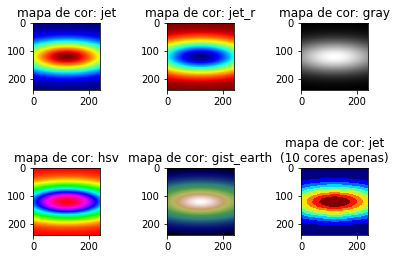

In [13]:
import numpy as np
import matplotlib.mlab as mlab    #  comandos compativeis com Matlab
import matplotlib.pyplot as plt
import matplotlib.cm as cm        # submódulo de mapas de cor

# cria matriz Z que contém alguns dados interessantes
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z = mlab.bivariate_normal(X, Y, 3.0, 1.0, 0.0, 0.0)

# ajuste de espaçamento dos subplots para evitar sobreposição
aux = 1.0
subplots_adjust(wspace=aux, hspace=aux)

Nx, Ny = 2, 3
plt.subplot(Nx, Ny, 1)  # próximo plot será mostrado no
                        # primeiro subplot como uma 
                        # matriz Nx x Ny de subplots

plt.imshow(Z, cmap=cm.jet)  # mapa de cor padrão 'jet'
plt.title("mapa de cor: jet")

plt.subplot(Nx, Ny, 2)   # próximo plot para segundosubplot
plt.imshow(Z, cmap=cm.jet_r)  # mapa de cor jet reverso
plt.title("mapa de cor: jet_r")

plt.subplot(Nx, Ny, 3)
plt.imshow(Z, cmap=cm.gray)
plt.title("mapa de cor: gray")

plt.subplot(Nx, Ny, 4)
plt.imshow(Z, cmap=cm.hsv)
plt.title("mapa de cor: hsv")

plt.subplot(Nx, Ny, 5)
plt.imshow(Z, cmap=cm.gist_earth)
plt.title("mapa de cor: gist_earth")

plt.subplot(Nx, Ny, 6)

# produz isolinhas reduzindo o número de cores para 10
mycmap = cm.get_cmap('jet', 10)    # 10 cores discretas
plt.imshow(Z, cmap=mycmap)
plt.title("mapa de cor: jet\n(10 cores apenas)")

plt.savefig("static/data/15-pylabimshowcm.pdf")

### Plots de *z = f(x,y)* e outros recursos do Matplotlib

O Matplotlib tem um grande número de recursos e pode criar todo padrão de plotagens (1D e 2D): tais como histogramas, gráficos circulares, gráficos de dispersão, plotagens de intensidade 2D (i.e *z = f(x,y)* e linhas de contorno) e muito mais. O programa `contour_demo.py` é um exemplo padrão do pacote `pylab` (vide figura abaixo). O seguinte link fornece o código-fonte para produzir este tipo de plotagem: [contour\_demo.py](http://matplotlib.org/examples/pylab_examples/contour_demo.html).

Outros exemplos são:

-  <http://matplotlib.org/users/screenshots.html>
-   <http://matplotlib.org/gallery.html>
-   Recentemente, a criação de plotagens 3D foi adicionada ao pylab: <http://matplotlib.org/examples/mplot3d/index.html#mplot3d-examples>

<img src="static/data/contour_demo.png" alt="Saída de contour_demo.py." style="width:80.0%" />


Visualizando dados em dimensões superiores
-----------------------------------

Muitas vezes, precisamos entender os dados definidos em posições no espaço 3D. Os dados em si são muitas vezes um campo escalar (como uma temperatura) ou um vetor 3D (como velocidade ou campo magnético), ou ocasionalmente um tensor. Por exemplo, para um campo vetorial 3D (definido como $\vec{f}(\vec{x})$, onde $\vec{x} \in \! \mathbb{R}^3$ e $\vec{f}(\vec{x}) \in \! \mathbb{R}^3$), poderíamos desenhar uma seta 3D em cada ponto (grade) no espaço. É comum que esses conjuntos de dados dependam do tempo.

A biblioteca provavelmente mais comumente utilizada nas ciências e engenharia para visualizar tais conjuntos de dados é provavelmente o VTK, *Visualization ToolKit* (<http://vtk.org>). Esta é uma importante biblioteca C++ com interfaces para linguagens de alto nível, incluindo o Python.

Pode-se chamar essas rotinas diretamente do código Python ou escrever os dados no disco em um formato que a biblioteca VTK pode ler (chamados arquivos *vtk*) e, em seguida, usar um programa como Mayavi, ParaView ou VisIt para ler esses arquivos de dados e manipulá-los (com uma interface gráfica). Todos estes três estão usando a biblioteca VTK internamente e podem ler arquivos *vtk*.

Este pacote é muito adequado para visualizar campos estáticos e temporais 2D e 3D (campos escalares, vetoriais e tensoriais).

### Mayavi, Paraview, Visit

-   *Homepage* do Mayavi: <http://code.enthought.com/projects/mayavi/>

-   *Homepage* do Paraview:  <http://paraview.org>

-   *Homepage* do VisIt:  <https://wci.llnl.gov/simulation/computer-codes/visit/>

<!-- <img src="static/images/mayavi/vector_field_combination.png" alt="image" style="width:49.0%" /><img src="static/images/mayavi-samp.png" alt="image" style="width:49.0%" /> 

Dois exemplos de visualizações do MayaVi.
-->

### Escrevendo arquivos vtk a partir do Python (pyvtk)

Uma pequena, mas poderosa biblioteca Python está disponível em <https://code.google.com/p/pyvtk/>. Ela permite criar arquivos *vtk* a partir de estruturas de dados do Python muito facilmente.

Dada uma malha de elementos finitos ou um conjunto de dados de diferenças finitas em Python, pode-se usar o *pyvtk* para escrever esses dados em arquivos e, em seguida, usar uma das aplicações de visualização listadas acima para carregar os arquivos *vtk* para exibi-los e investigá-los.